# Лабораторная работа 4
# Правильный многоугольник Рело. Векторизация вычислений в `numpy`

# Задание 4.1. Построение треугольника Рело
# Выполнение задания 4.1

#### Гимбицкий Матвей, 30.03

Полагаем, что заданы координаты центра правильного треугольника Рело `center` , ширина треугольника Рело `r` и количество точек для описания одной стороны треугольника Рело `N.`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Определим переменные

In [2]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус `R` окружности, описанной вокруг правильного *n*-угольника с длиной стороны , вычисляется по формуле</br>
$$R=\frac{l}{2sin\pi/n} $$
Длина стороны *l* правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело

In [3]:
l=r

In [4]:
R = l/(2*np.sin(np.pi/n))

Вычислим радиус описанной окружности `R`

Зафиксируем прямоугольную декартову систему координат. Центр треугольника размещаем в точке `center` . Построим матрицу `vertices` с координатами вершин правильного треугольника, используя параметрическое описание точек описанной окружности по формуле $x(t)=x_{\text{0}}+Rcos(t), y(t)=y_{\text{0}}+Rsin(t) $, для значений $t \in {0,2\pi/3,4\pi/3} $.

In [5]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

Для доступа к элементам матрицы в numpy можно использовать индексацию с двумя индексами

In [6]:
vertices[0,0], vertices[0,:], vertices[:,1]

(np.float64(5.773502691896258),
 array([5.77350269, 0.        ]),
 array([ 0.,  5., -5.]))

Построим изображение вершин треугольника

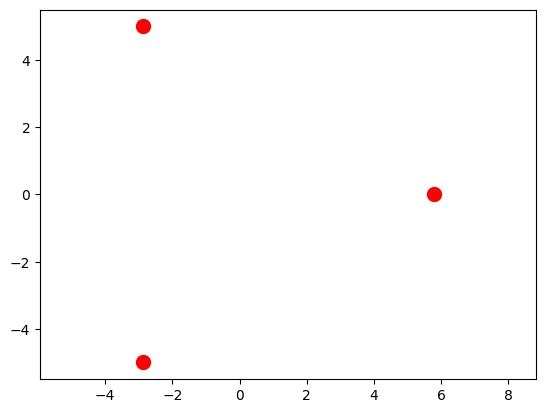

In [7]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

## Этап 2. Представление одной стороны треугольника Рело

Обозначим через $a$ центральный угол, соответствующий стороне правильного n-угольника. Тогда
$$ a=2\pi/n$$

Обозначим через $b$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. Тогда

In [8]:
alpha = 2*np.pi/n
beta = alpha/2

Вычислим массив angle значений угла для построения координат точек стороны треугольника Рело, состоящий из N элементов

In [9]:
angle = np.linspace(-beta/2, beta/2, N)

In [10]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

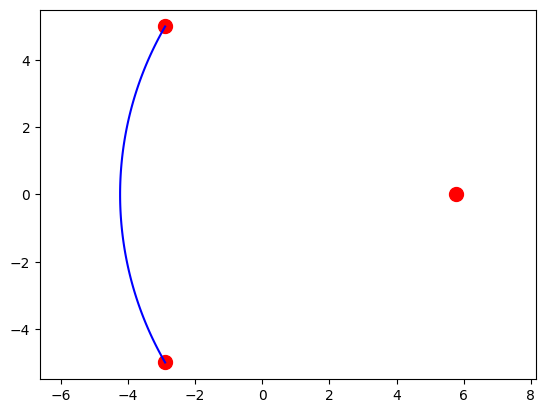

In [11]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

Вычислим матрицу `side1` с координатами точек, описывающих сторону треугольника Рело относительно второй вершины `vertices[1]`. Сторона представляет собой дугу окружности радиуса $r$ с центром в точке `vertices[1]` и значением угла $[\pi - \beta / 2 + \alpha, \pi + \beta / 2 + \alpha]$


In [12]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),np.sin(angle + np.pi + alpha)])


Построим изображение вершин и двух сторон треугольника Рело

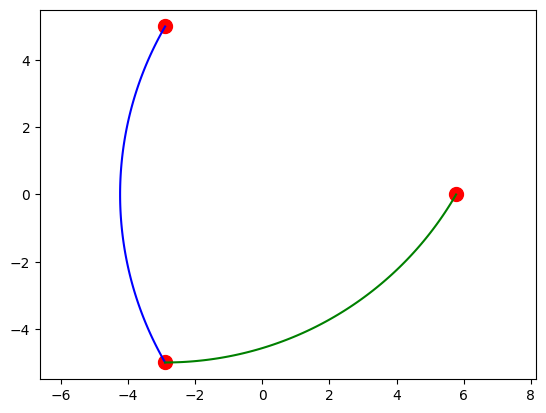

In [13]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

## Этап 3. Моделирование границы треугольника Рело

Создадим СПИСОК из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело

In [14]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

С помощью фунции `concatenate` из расширения `numpy` объединим массивы,
созданные для каждой из сторон треугольника Рело, в единый массив `sides`

In [15]:
sides = np.concatenate(list_sides)

Построим изображение вершин и всех сторон треугольника Рело

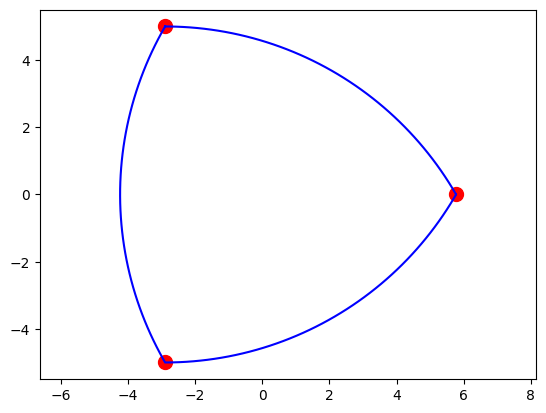

In [16]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

# Задание 4.2. Построение правильного многоугольника Рело

n - кол-во сторон</br>
N - кол-во точек разбиения</br> 
r - ширина</br>
center - центр</br>

Начнем с построени вершин:
</br> для этого распишем сначала получаемые углы 

In [17]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])

vertices - матрица вершин

$a$ центральный угол соответсвующий стороне правильного n-угольника

 $b$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника

In [18]:
alpha = 2*np.pi/n
beta = alpha/2

Создадим матрицу с точками задающими стороны многоугольника

In [19]:
sides = np.concatenate([vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)])

Однако нужно найти радиус описанной окружности около многоульника, он задается формулой $$R=\frac{l}{2sin\pi/n} $$
но мы не знаем длину строны многоульника

Радиус круга $r$ согласован с длиной стороны $l$ правильного многоугольника таким образом, чтобы окружность радиуса $r$ с центром в вершине правильного $n$-угольника проходила через две соседние вершины правильного $n$-угольника, противолежащие центру.

При этом за угол $b$ мы как раз таки обозначили угол, соответствующий стороне правильного многоугольника, когда центр лежит в вершине правильного $n$-угольника. С другой стороны, это центральный угол окружности радиусом $r$, центр которого расположен в вершине, а хорда лежащая напротив этого угла как раз таки является стороной многоульника. Её можно найти по теореме косинусов для этого треугольника 
$$l^2=r^2+r^2-2*r*r*\cos(b) $$
$$
l = \sqrt{2*r^2(1-\cos(b))}
$$

In [20]:
l=math.sqrt(2*r*r*(1-math.cos(beta)))

Теперь зная длину стороны найдем радиус описанной окружности

In [21]:
R = l/(2*np.sin(np.pi/n))

# Задание 4.3. Результирующая пользовательская функция

In [22]:
def regular_polygon_Relo(n=3, center=np.array([0, 0]), r=1, N=100):
    """
    Создаёт матрицу точек, описывающих границу правильного многоугольника Рело.

    Аргументы:
    n (int): Количество вершин правильного многоугольника (нечётное, > 2).
    center (np.ndarray): Координаты центра многоугольника (массив из 2 элементов).
    r (float): Ширина многоугольника (положительное число).
    N (int): Количество точек для одной стороны (натуральное число).

    Возвращает:
    np.ndarray: Матрица с координатами точек границы многоугольника Рело.
    """
    assert isinstance(n, int) and n > 2 and n % 2 == 1, "n должно быть нечётным целым числом больше 2"
    assert isinstance(center, np.ndarray) and center.shape == (2,), "center должен быть массивом из 2 элементов"
    assert isinstance(r, (int, float)) and r > 0, "r должно быть положительным числом"
    assert isinstance(N, int) and N > 0, "N должно быть натуральным числом"
    alpha = 2*np.pi/n
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    l=math.sqrt(2*r*r*(1-math.cos(beta)))
    R = l/(2*np.sin(np.pi/n))
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    sides = np.concatenate([vertices[i] +
     r*np.transpose([np.cos(angle + np.pi + i*alpha),
     np.sin(angle + np.pi + i*alpha)])
     for i in range(n)])
    return sides

# Задание 4.4. Тестирование функции

In [33]:
import relo
import numpy as np

In [34]:
relo.regular_polygon_Relo(n=2)

AssertionError: n должно быть нечётным целым числом больше 2

In [35]:
relo.regular_polygon_Relo(center=[0, 0])


AssertionError: center должен быть массивом из 2 элементов

In [36]:
relo.regular_polygon_Relo(n=6)

AssertionError: n должно быть нечётным целым числом больше 2

In [37]:
relo.regular_polygon_Relo(r=-1)

AssertionError: r должно быть положительным числом

In [38]:
relo.regular_polygon_Relo(N=3.5)

AssertionError: N должно быть натуральным числом

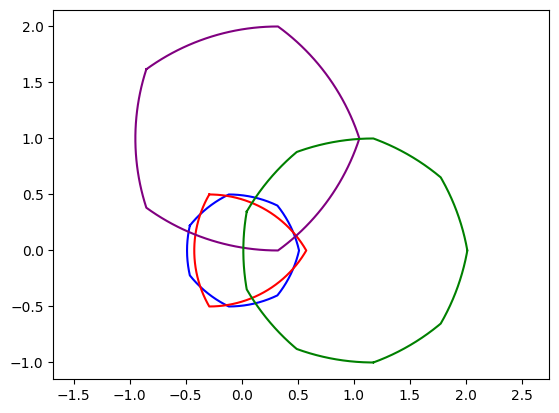

In [39]:
plt.figure()
ax=plt.axes()
sides1 = relo.regular_polygon_Relo(7, np.array([0, 0]), 1, 100)
ax.plot(sides1[:, 0], sides1[:, 1],'b-',markersize=20)
sides2 = relo.regular_polygon_Relo()
ax.plot(sides2[:, 0], sides2[:, 1],'r-',markersize=20)
sides3 = relo.regular_polygon_Relo(n=5, center=np.array([0, 1]), r=2, N=70)
ax.plot(sides3[:, 0], sides3[:, 1],'purple',markersize=20)
sides4 = relo.regular_polygon_Relo(9, np.array([1, 0]), N=150, r=2)
ax.plot(sides4[:, 0], sides4[:, 1],'green',markersize=20)
plt.axis('equal');